In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

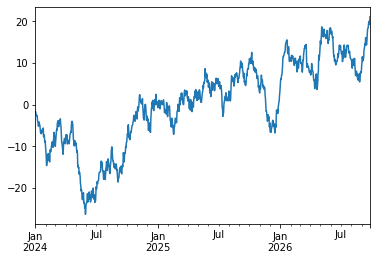

In [7]:
np.random.seed(89)
ts = pd.Series(np.random.randn(1000),index=pd.date_range('2024-01-01', periods=1000))
ts = ts.cumsum()
ts.plot()

<Axes: >

<Figure size 432x288 with 0 Axes>

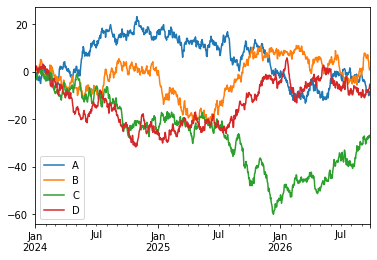

In [8]:
df = pd.DataFrame(np.random.randn(1000,4),index=ts.index, columns=list('ABCD'))
df = df.cumsum()
plt.figure()
df.plot()

<Axes: xlabel='A'>

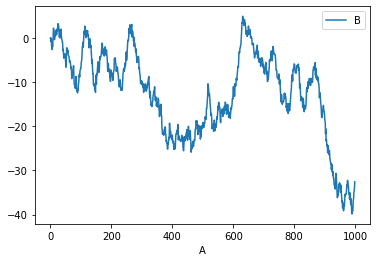

In [9]:
df3 = pd.DataFrame(np.random.randn(1000,2),columns=["B","C"]).cumsum()
df3["A"] = pd.Series(list(range(len(df))))
df3.plot(x="A",y="B")

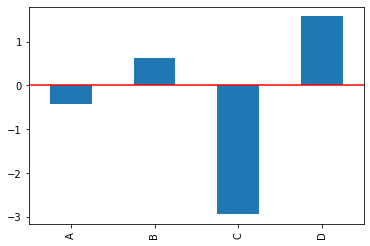

In [12]:
#wykres słupkowy
plt.figure()
df.iloc[5].plot.bar()
plt.axhline(0,color='r')

<Axes: >

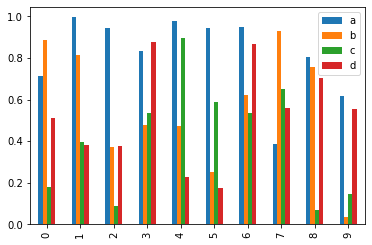

In [14]:
df2 = pd.DataFrame(np.random.rand(10,4),columns=["a","b","c","d"])
df2.plot.bar()

<Axes: >

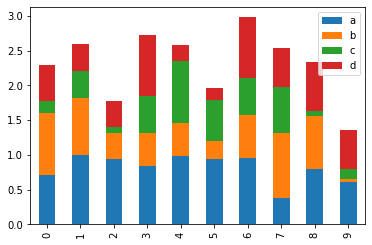

In [15]:
#wykres kumulacyjny
df2.plot.bar(stacked=True)

<Axes: >

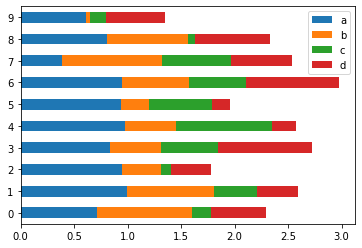

In [16]:
#wykres kolumnowy
df2.plot.barh(stacked=True)

In [21]:
df = pd.DataFrame({
    "strings":["Adam","Maja"],
    "ints":[2,7],
    "floats":[1.12,3450.66]
})
df.style \
    .format(precision=3, thousands=".", decimal=",") \
    .format_index(str.upper,axis=1) \
    .relabel_index(["row 1", "row 2"],axis=0)

,STRINGS,INTS,FLOATS
row 1,Adam,2,"1,120"
row 2,Maja,7,"3.450,660"


In [20]:
weather_df = pd.DataFrame(np.random.rand(10,2)*7.5,
                          index=pd.date_range(start="2023-12-01",periods=10),
                          columns=["Tokyo","Bejing"])


weather_df

,Tokyo,Bejing
2023-12-01,7.206852,6.940496
2023-12-02,1.386857,2.118795
2023-12-03,5.126521,5.423726
2023-12-04,5.357469,0.009729
2023-12-05,2.098643,4.202430
2023-12-06,3.192294,2.890999
2023-12-07,7.047556,4.478885
2023-12-08,3.091803,3.959372
2023-12-09,2.265699,5.518572
2023-12-10,6.812929,3.473675


In [22]:
def rain_condition(v):
    if v <1.75:
        return "Sucho"
    elif v<2.75:
        return "Deszcz"
    return "Mocno Pada..."

def make_pretty(styler):
    styler.set_caption("Warunki pogodowe")
    styler.format(rain_condition)
    styler.format_index(lambda v:v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=7.5, cmap="YlGnBu")
    return styler


In [23]:
weather_df.loc["2023-12-01":"2023-12-05"].style.pipe(make_pretty)

,Tokyo,Bejing
Friday,Mocno Pada...,Mocno Pada...
Saturday,Sucho,Deszcz
Sunday,Mocno Pada...,Mocno Pada...
Monday,Mocno Pada...,Sucho
Tuesday,Deszcz,Mocno Pada...
